<a href="https://colab.research.google.com/github/Ghatazhak/Capstone/blob/main/emailclasser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Email Classer
 A machine learning program that classifies emails as either spam or not spam. It uses a decision tree algorithm to determine whether an email is spam or not spam.


The model accuracy is: 91.56


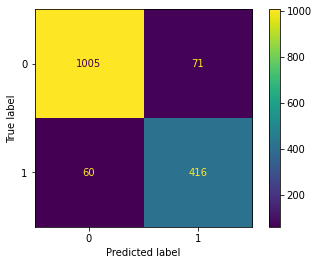

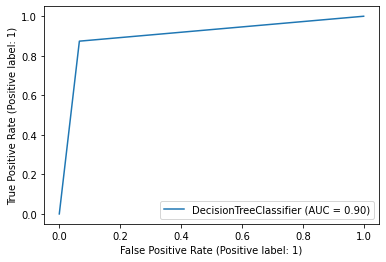

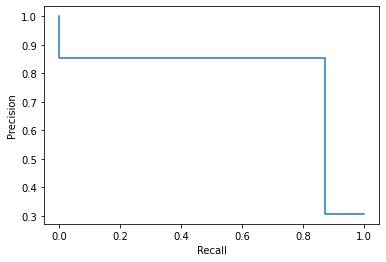

In [93]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, det_curve, DetCurveDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

email_df = pd.read_csv('https://raw.githubusercontent.com/Ghatazhak/Capstone/main/emails.csv')

X = email_df.drop(columns=['Email No.','Prediction']) # Removed column one and the last column.
y = email_df[['Prediction']] # Only keep the last column.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Split the data set for training and testing.

ml_model = DecisionTreeClassifier() # Decision Tree Algorithm model
ml_model.fit(X_train.values, y_train.values) # train the decision tree model.

predictions = ml_model.predict(X_test.values) # Run the test data through the model
accuracy = accuracy_score(y_test, predictions) # Checking predictions of model

print('The model accuracy is: %5.2f' %(accuracy * 100))

# Confusion Matrix Implementation
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# RocCurve Implementation
disp = RocCurveDisplay.from_estimator(ml_model, X_test.values, y_test.values)

# Precision_recall_curve inmplementation
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp_prec_recall = PrecisionRecallDisplay(precision=precision, recall=recall)
disp_prec_recall.plot()

pyplot.show()

# How to test emails manually
Click the button + Code under file menu, then double left click into this text, and highlight the code below CTRL+C, then click into the code section below and CTRL+V. Finally click the run button on left side of the code cell. It will load 10 new emails and print output stating whether each  email is spam or not.

////////////////////////////COPY CODE BELOW/////////////////////////////////////

manual_emails = pd.read_csv('https://raw.githubusercontent.com/Ghatazhak/Capstone/main/manual_test_emails.csv')

Xm = manual_emails.drop(columns=['Email No.','Prediction']) # Removed column 
ym = manual_emails[['Prediction']] # Only keep the last column.
manual_predictions = ml_model.predict(Xm.values) # Run the test data through the model

for index, value in enumerate(manual_predictions):
  if value == 0:
    print(f'Email {index} is not spam!')
  else:
    print(f'Email {index} is spam!')






